In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/Asus/pk/merged-dataset 2019-2021.xlsx")

In [3]:
df.head()

Station Code                                       Station Name  \
0          26.0  WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA   
1        1513.0  BOREWELL KRISHNA MURTHY, D.NO. 48-16-43 AUTONA...   
2        1514.0  BOREWELL        VIJAY        KUMAR AUTONAGAR V...   
3        1516.0                BOREWELL OF NAVLOK GARDENS, NELLORE   
4        1517.0           BOREWELL  NEAR  TUNGBHADRA RIVER KURNOOL   

       State Name  Year  Temperature ⁰C    pH  Conductivity (µmhos/cm)  \
0  ANDHRA PRADESH  2019            25.5  7.85                   1827.5   
1  ANDHRA PRADESH  2019            26.0  7.55                   1834.5   
2  ANDHRA PRADESH  2019            25.5  7.55                   1718.0   
3  ANDHRA PRADESH  2019            19.0  7.95                   1228.0   
4  ANDHRA PRADESH  2019            22.0  7.50                   5010.0   

   B.O.D.  Nitrate-N + Nitrite-N (mg/l)  Faecal Coli form (MPN/100ml)  \
0    1.10                         1.955                         219.5   
1    1.10                         2.275                         432.0   
2    2.65                         0.840                         210.5   
3    1.20                         1.580                         210.5   
4    0.80                         4.000                           2.0   

   Total Coli form (MPN/100ml)  
0                          2.5  
1                          2.5  
2                          2.5  
3                          2.5  
4                          2.0

In [4]:
df.shape

(3107, 11)

In [5]:
df.isnull().sum()

Station Code                    6
Station Name                    0
State Name                      6
Year                            0
Temperature ⁰C                  0
pH                              0
Conductivity (µmhos/cm)         0
B.O.D.                          0
Nitrate-N + Nitrite-N (mg/l)    0
Faecal Coli form (MPN/100ml)    0
Total Coli form (MPN/100ml)     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Station Code                    0
Station Name                    0
State Name                      0
Year                            0
Temperature ⁰C                  0
pH                              0
Conductivity (µmhos/cm)         0
B.O.D.                          0
Nitrate-N + Nitrite-N (mg/l)    0
Faecal Coli form (MPN/100ml)    0
Total Coli form (MPN/100ml)     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3106
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station Code                  3101 non-null   float64
 1   Station Name                  3101 non-null   object 
 2   State Name                    3101 non-null   object 
 3   Year                          3101 non-null   int64  
 4   Temperature ⁰C                3101 non-null   float64
 5   pH                            3101 non-null   float64
 6   Conductivity (µmhos/cm)       3101 non-null   float64
 7   B.O.D.                        3101 non-null   float64
 8   Nitrate-N + Nitrite-N (mg/l)  3101 non-null   float64
 9   Faecal Coli form (MPN/100ml)  3101 non-null   float64
 10  Total Coli form (MPN/100ml)   3101 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 290.7+ KB


In [9]:
df.shape

(3101, 11)

In [10]:
df_final = df.select_dtypes(exclude="object")

In [11]:
df.columns

Index(['Station Code', 'Station Name', 'State Name', 'Year', 'Temperature ⁰C',
       'pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)'],
      dtype='object')

In [12]:
df_final.drop(["Station Code",'Temperature ⁰C','Year'], axis=1, inplace=True)

In [13]:
df_final.head()

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
0  7.85                   1827.5    1.10                         1.955   
1  7.55                   1834.5    1.10                         2.275   
2  7.55                   1718.0    2.65                         0.840   
3  7.95                   1228.0    1.20                         1.580   
4  7.50                   5010.0    0.80                         4.000   

   Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)  
0                         219.5                          2.5  
1                         432.0                          2.5  
2                         210.5                          2.5  
3                         210.5                          2.5  
4                           2.0                          2.0

In [14]:
wi = np.array([0.3344, 0.0028425, 0.5685, 0.0632, 0.28425, 0.0028425])

In [15]:
si = np.array([8.5, 1000, 5, 45, 100, 1000])

In [16]:
videal = np.array([7, 0, 0, 0, 0, 0])

In [17]:
def calc_wqi(sample):
    wqi_sample = 0
    num_col = 6
    for index in range(num_col):
        v_index = sample[index]
        v_index_ideal = videal[index]
        w_index = wi[index]
        std_index = si[index]
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100
        wqi_sample += q_index * w_index
    return wqi_sample

In [18]:
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [19]:
wqi_arr = calc_wqi_for_df(df_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [20]:
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(3101, 7)

In [21]:
df_wqi[(df_wqi["WQI"] < 0)]

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
60    6.00                    121.0     1.3                          1.20   
201   6.65                    613.0     0.0                          4.15   
209   6.30                    307.0     0.0                          2.89   
210   6.50                    238.0     0.0                          0.10   
211   6.50                     98.0     0.0                          0.06   
...    ...                      ...     ...                           ...   
2999  5.60                     91.5     1.0                          0.30   
3000  6.10                    111.5     1.0                          0.30   
3001  5.65                    114.0     1.0                          0.30   
3002  5.85                    104.5     1.0                          0.30   
3037  6.40                    199.5     1.0                          0.30   

      Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)        WQI  
60                             2.0                          2.0  -6.740337  
201                            6.0                          4.5  -5.338798  
209                            2.0                          0.0 -14.543684  
210                            8.0                          0.0  -8.790971  
211                            2.0                          0.0 -10.541883  
...                            ...                          ...        ...  
2999                           2.0                          2.0 -19.203456  
3000                           2.0                          2.0  -8.051104  
3001                           2.0                          2.0 -18.082394  
3002                           2.0                          2.0 -13.626427  
3037                           2.0                          2.0  -1.338090  

[427 rows x 7 columns]

In [22]:
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [23]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (1 if (x <= 25)  
                                        else(2 if (26<=x<=50) 
                                        else(3 if (51<=x<=75) 
                                        else(4 if (76<=x<=100) 
                                        else 5)))))

In [24]:
df_wqi.head()

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
0  7.85                   1827.5    1.10                         1.955   
1  7.55                   1834.5    1.10                         2.275   
2  7.55                   1718.0    2.65                         0.840   
3  7.95                   1228.0    1.20                         1.580   
4  7.50                   5010.0    0.80                         4.000   

   Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)         WQI  \
0                         219.5                          2.5   94.643955   
1                         432.0                          2.5  148.406012   
2                         210.5                          2.5  102.833484   
3                         210.5                          2.5   95.228964   
4                           2.0                          2.0   22.797605   

   WQI clf  
0        4  
1        5  
2        5  
3        4  
4        1

In [25]:
df_wqi["WQI clf"].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [26]:
merged_dataset_without_temperature = 'dataset without temperature.xlsx'
df_wqi.to_excel(merged_dataset_without_temperature, index=False)

In [27]:
df_wqi["WQI clf"].value_counts()

1    1702
2     647
5     202
3      83
4      40
Name: WQI clf, dtype: int64

In [28]:
df_wqi.shape

(2674, 8)

In [29]:
df_wqi.columns

Index(['pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)', 'WQI', 'WQI clf'],
      dtype='object')

In [30]:
X = df_wqi[['pH','Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)']]

In [31]:
y = df_wqi[['WQI clf']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9644859813084112
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       360
           2       0.96      0.96      0.96       112
           3       0.79      0.85      0.81        13
           4       1.00      0.57      0.73         7
           5       0.87      0.79      0.83        43

    accuracy                           0.96       535
   macro avg       0.92      0.83      0.86       535
weighted avg       0.96      0.96      0.96       535



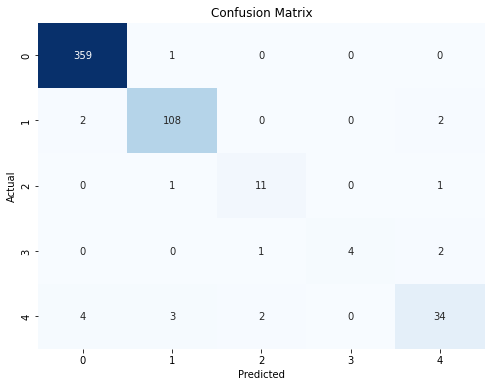

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into X and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE

# # Assuming you have already loaded your dataset into X and y

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to balance the class distribution in the training data
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Standardize the features (recommended for neural networks)
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# # Create and train the neural network
# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# mlp.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test set
# y_pred = mlp.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_rep)
